<center><h2 style="color:#B01E68">Comparing My Multiple Linear Regression with Sklearn's</h2></center>

<center><h3 style="color:#DC3535">1. Loading Python Modules and Training Data

In [15]:
import numpy as np
np.set_printoptions(suppress=True, precision=2)
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [16]:
#Columns: Sepal length[cm], Sepal width[cm], Petal length[cm], Petal width[cm], Iris species
data = np.genfromtxt('iris.data', delimiter=',', dtype=object)

In [17]:
#Target - Petal length [cm]
y_train = data[:, 2].astype(float)

x_features = ['Petal width [cm]', 'Sepal length [cm]', 'Sepal width [cm]']
x_train = np.c_[data[:,3], data[:,:2]].astype(float)

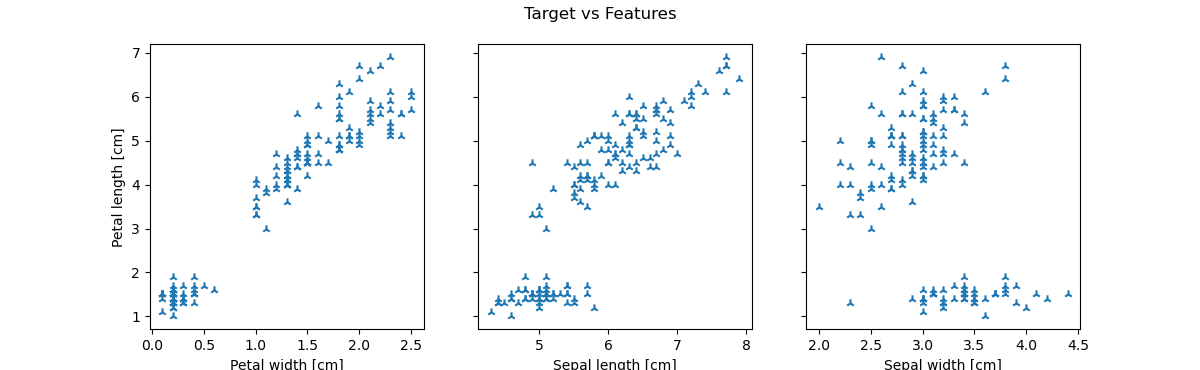

In [18]:
fig1, ax = plt.subplots(1, 3, figsize=(12, 3.7), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, marker = '2')
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel('Petal length [cm]')
fig1.suptitle('Target vs Features')
plt.show()

<center><h3 style="color:#DC3535">2. Z-score normalization </h3></center>

<center><h4 style="color:#F49D1A">2.1 My Z-score normalization </h4></center>

In [19]:
print(f'Range of values of each raw feature: {np.ptp(x_train,axis=0)}')
print(f'Mean of raw features: {np.mean(x_train, axis=0)}')
print(f'Standard deviation of raw features: {np.std(x_train, axis=0)}')

Range of values of each raw feature: [2.4 3.6 2.4]
Mean of raw features: [1.2  5.84 3.05]
Standard deviation of raw features: [0.76 0.83 0.43]


In [20]:
#Defining my z-score normalization function
def zscore_norm(x):
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    x_norm = (x - mean) / std
    return x_norm, mean, std

#Running the normalization on x_train
x_norm, norm_mean, norm_std = zscore_norm(x_train)

print(f'Range of values of each normalized feature: {np.ptp(x_norm,axis=0)}') 
print(f'Mean of normalized features: {np.mean(x_norm, axis=0)}')
print(f'Standard deviation of normalized features: {np.std(x_norm, axis=0)}')

Range of values of each normalized feature: [3.16 4.36 5.55]
Mean of normalized features: [-0. -0. -0.]
Standard deviation of normalized features: [1. 1. 1.]


<center><h4 style="color:#F49D1A">2.2 Sklearn Z-score normalization </h4></center>

In [21]:
scaler = StandardScaler()
skl_x_norm = scaler.fit_transform(x_train)

print(f'Range of values of each Sklearn normalized feature: {np.ptp(skl_x_norm,axis=0)}') 
print(f'Mean of Sklearn normalized features: {np.mean(skl_x_norm, axis=0)}')
print(f'Standard deviation of Sklearn normalized features: {np.std(skl_x_norm, axis=0)}')

Range of values of each Sklearn normalized feature: [3.16 4.36 5.55]
Mean of Sklearn normalized features: [-0. -0. -0.]
Standard deviation of Sklearn normalized features: [1. 1. 1.]


<center><h3 style="color:#DC3535">3. Gradient descent

<center><h4 style="color:#F49D1A">3.1 My implementation of gradient descent</h4></center>

In [22]:
#Cost function
compute_cost = lambda x,y,w,b : np.sum((np.dot(x, w) + b - y)**2) / (2 * x.shape[0])

#Gradient function
def gradient(x_train, y_train, w, b): 
    error = np.dot(x_train, w) + b - y_train
    deriv_w = np.sum(error[:, np.newaxis] * x_train, 0) / x_train.shape[0]
    deriv_b = np.sum(error) / x_train.shape[0]                         
        
    return deriv_w, deriv_b

#Gradient descent function
def g_desc(x, y, w_strt, b_strt, alpha, max_iter=1000):
    w, b, cost_hist = w_strt, b_strt, []
    
    for i in range(max_iter):
        d_w, d_b = gradient(x, y, w, b)
        w -= alpha * d_w
        b -= alpha * d_b
        
        cost_hist.append(compute_cost(x,y,w,b))
        
        if i%100 == 0:
            print(f'Iteration: {i:>4}, cost: {round(cost_hist[-1], 4):>7}')
    
    return w, b, cost_hist

In [23]:
w_optimal, b_optimal, cost_hist = g_desc(x_norm, y_train, np.zeros(3), 0, 1)
print(f'My weights: {w_optimal}\nMy bias: {b_optimal} ')

Iteration:    0, cost:  1.3579
Iteration:  100, cost:  0.0492
Iteration:  200, cost:  0.0492
Iteration:  300, cost:  0.0492
Iteration:  400, cost:  0.0492
Iteration:  500, cost:  0.0492
Iteration:  600, cost:  0.0492
Iteration:  700, cost:  0.0492
Iteration:  800, cost:  0.0492
Iteration:  900, cost:  0.0492
My weights: [ 1.1   0.6  -0.28]
My bias: 3.758666666666668 


<center><h4 style="color:#F49D1A">5.2 Gradient descent with Sklearn </h4></center>

In [24]:
skl_gdesc = SGDRegressor(max_iter=1000)
skl_gdesc.fit(skl_x_norm, y_train)

print(f"Number of iterations: {skl_gdesc.n_iter_}")
print(f'Sklearn weights: {skl_gdesc.coef_}\nSklearn bias: {skl_gdesc.intercept_} ')

Number of iterations: 19
Sklearn weights: [ 1.    0.69 -0.31]
Sklearn bias: [3.74] 


<center><h3 style="color:#DC3535">6. Plotting the normalized model's predictions vs true values

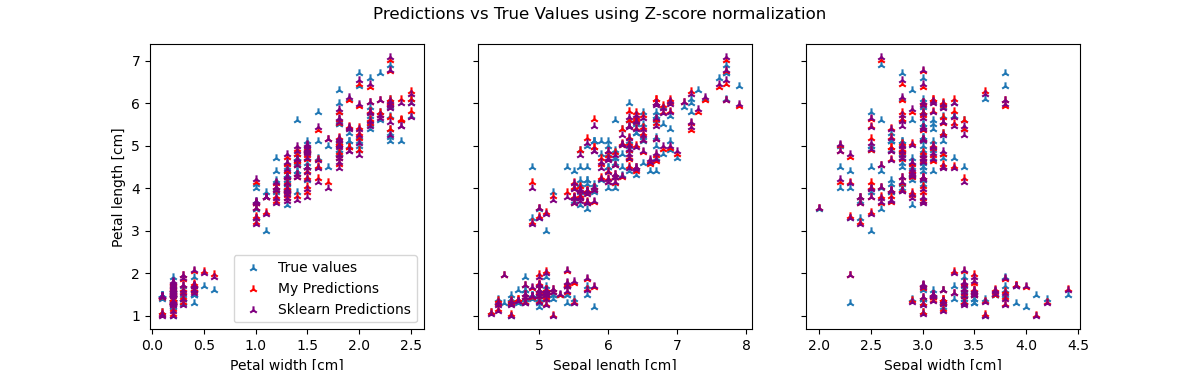

In [25]:
#Predictions vs true values 
y_predicted = np.dot(x_norm, w_optimal) + b_optimal
skl_y_predicted = np.dot(skl_x_norm, skl_gdesc.coef_) + skl_gdesc.intercept_

#Predictions and true values vs raw features    
fig4, ax = plt.subplots(1,3,figsize=(12, 3.7),sharey=True)
for i in range(len(ax)):
    ax[i].set_xlabel(x_features[i])
    #True
    ax[i].scatter(x_train[:,i],y_train, label = 'True values', marker='2')
    #My Predictions
    ax[i].scatter(x_train[:,i], y_predicted, color='red', label = 'My Predictions', marker='2')
    #Sklearn predictions
    ax[i].scatter(x_train[:,i], skl_y_predicted, color='purple', label = 'Sklearn Predictions', marker='2')

ax[0].set_ylabel("Petal length [cm]"); ax[0].legend()
fig4.suptitle("Predictions vs True Values using Z-score normalization")
plt.show()